<a href="https://colab.research.google.com/github/Priti1694/CodingWomen/blob/master/Task_2_LinearReg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [93]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [94]:
url = "http://bit.ly/w-data"
df = pd.read_csv(url)
df.head(15)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


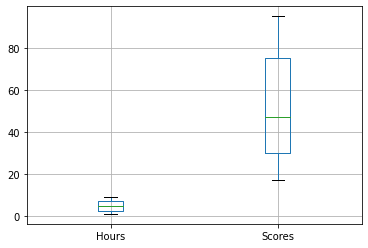

In [95]:
boxplot = df.boxplot(column=['Hours', 'Scores'])

In [96]:
X = df.iloc[:, :-1].values  
Y = df.iloc[:, 1].values  

In [97]:
Y

array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
       24, 67, 69, 30, 54, 35, 76, 86])

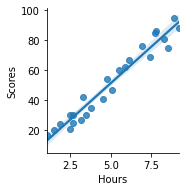

In [98]:
import seaborn as sns
sns.pairplot(df,x_vars=["Hours"],y_vars="Scores",
             kind='reg')

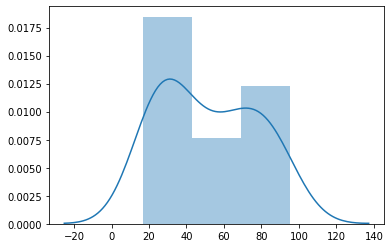

In [99]:
import seaborn as sns
sns.distplot(Y,hist=True)

In [100]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, Y, 
                            test_size=0.3, random_state=0) 

In [101]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train,y_train)

# print intercept and coefficients
print (lm.intercept_)
print (lm.coef_)

2.3708153823418883
[9.78856669]


In [102]:
print(X_test)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]
 [3.8]
 [1.9]
 [7.8]]


In [103]:
Y_pred=lm.predict(X_test)
print(Y_pred)

[17.05366541 33.69422878 74.80620886 26.8422321  60.12335883 39.56736879
 20.96909209 78.72163554]


In [104]:

# Comparing Actual vs Predicted
new_df = pd.DataFrame({'Actual': y_test, 'Predicted': Y_pred})  
new_df 

,Actual,Predicted
0,20,17.053665
1,27,33.694229
2,69,74.806209
3,30,26.842232
4,62,60.123359
5,35,39.567369
6,24,20.969092
7,86,78.721636


In [105]:
import statsmodels.formula.api as sm

# create a fitted model with all three features
lm_model = sm.ols(formula='Scores ~ Hours', data=df).fit()

# print the coefficients
print(lm_model.params)
print(lm_model.summary())

Intercept    2.483673
Hours        9.775803
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                 Scores   R-squared:                       0.953
Model:                            OLS   Adj. R-squared:                  0.951
Method:                 Least Squares   F-statistic:                     465.8
Date:                Sun, 20 Sep 2020   Prob (F-statistic):           9.13e-17
Time:                        15:49:34   Log-Likelihood:                -77.514
No. Observations:                  25   AIC:                             159.0
Df Residuals:                      23   BIC:                             161.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------

In [106]:
from sklearn.metrics import r2_score,mean_squared_error
import numpy as np

r2=r2_score(y_test,Y_pred)
print(r2)

rmse=np.sqrt(mean_squared_error(y_test,Y_pred))
print(rmse)

0.9568211104435257
4.7921912746363144


Text(0, 0.5, 'Residuals')

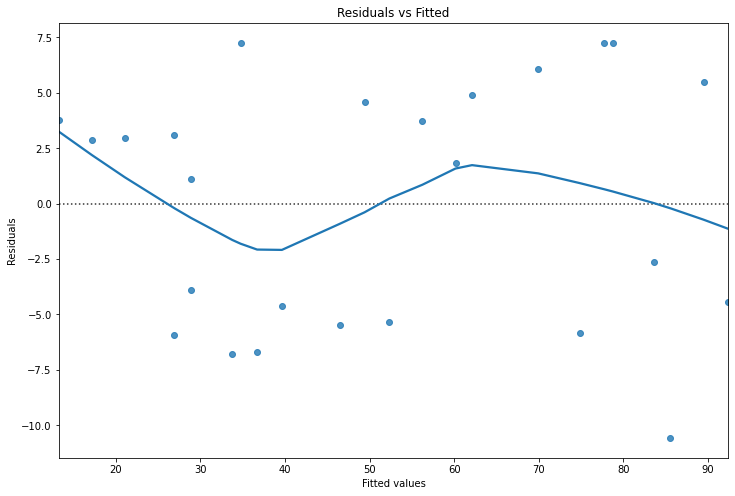

In [107]:
plot_lm_1 = plt.figure(1)
plot_lm_1.set_figheight(8)
plot_lm_1.set_figwidth(12)

# fitted values (need a constant term for intercept)
model_fitted_y = lm_model.fittedvalues

plot_lm_1.axes[0] = sns.residplot(model_fitted_y, 'Scores', data=df, lowess=True)

plot_lm_1.axes[0].set_title('Residuals vs Fitted')
plot_lm_1.axes[0].set_xlabel('Fitted values')
plot_lm_1.axes[0].set_ylabel('Residuals')

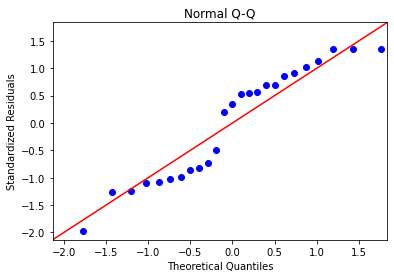

In [108]:
res = lm_model.resid
import statsmodels.api as stm
import scipy.stats as stats
fig = stm.qqplot(res,  fit=True, line='45')
plt.title('Normal Q-Q')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Standardized Residuals');
plt.show() 

In [114]:
# What will be predicted score if a student study for 9.25 hrs in a day?
hours = 9.25
own_pred = lm.predict([[hours]])
print("No of Hours = {}".format(hours))
print("Students Predicted score if he/she study for 9.25 hrs in a day : = {}".format(own_pred[0]))


No of Hours = 9.25
Students Predicted score if he/she study for 9.25 hrs in a day : = 92.91505723477056
